<h1>Outliers removal using IQR and boxplot</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')


In [4]:
df.shape

(1000, 3)

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


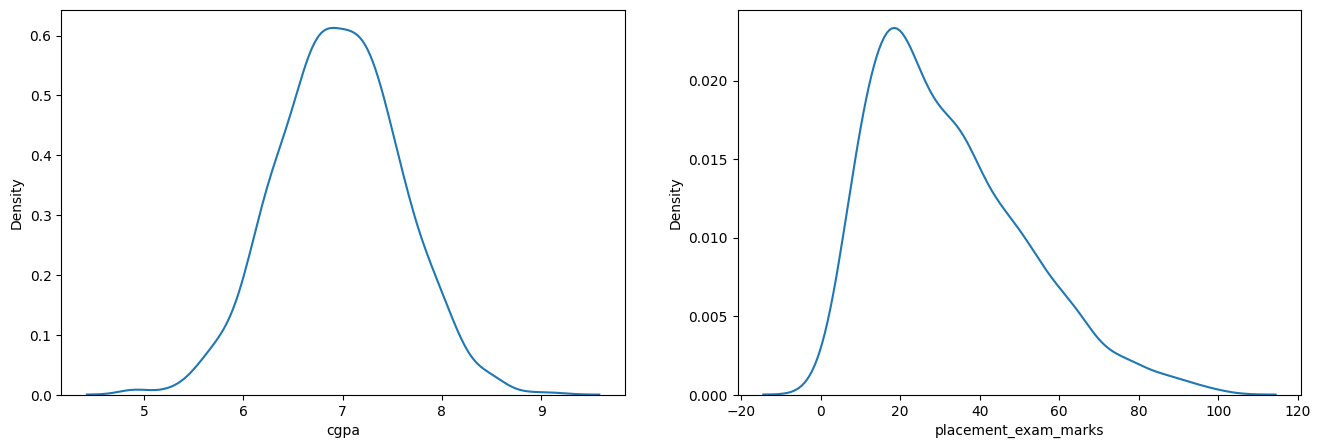

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [8]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [9]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

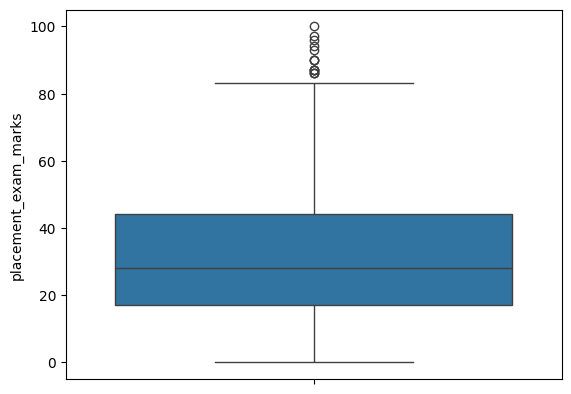

In [10]:
sns.boxplot(df['placement_exam_marks'])

In [14]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 , percentile75

(np.float64(17.0), np.float64(44.0))

In [15]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [17]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [18]:
lower_limit , upper_limit

(np.float64(-23.5), np.float64(84.5))

In [19]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


<h2>Trimming</h2>

In [20]:
new_df = df[(df['placement_exam_marks'] <= upper_limit) & (df['placement_exam_marks'] >= lower_limit)]

In [21]:
new_df.shape

(985, 3)

In [24]:
new_df['placement_exam_marks'].describe()

count    985.000000
mean      31.339086
std       17.857633
min        0.000000
25%       17.000000
50%       28.000000
75%       43.000000
max       83.000000
Name: placement_exam_marks, dtype: float64

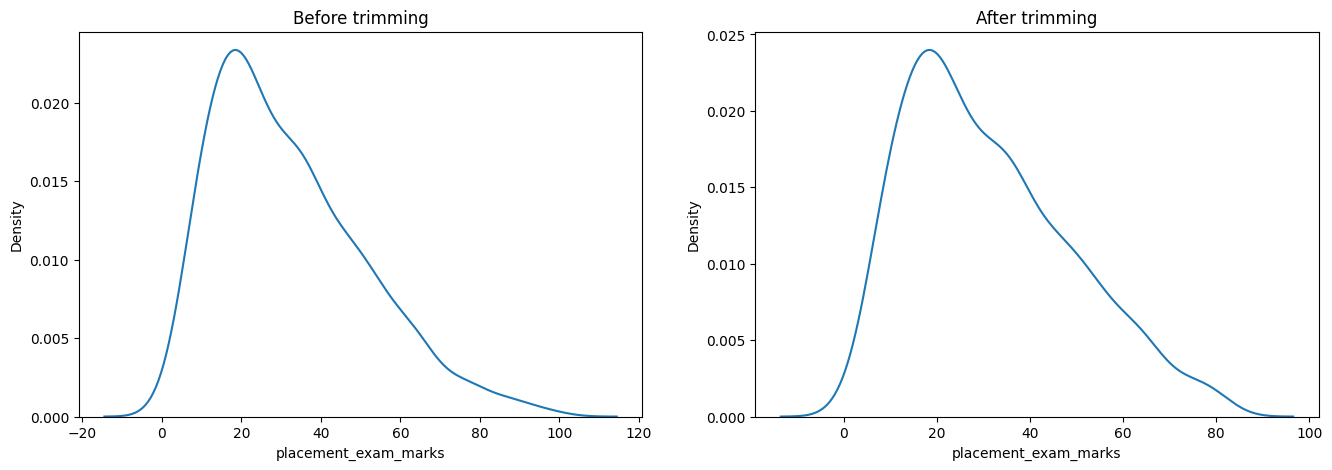

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['placement_exam_marks'])
plt.title('Before trimming')

plt.subplot(1,2,2)
sns.kdeplot(new_df['placement_exam_marks'])
plt.title('After trimming')

plt.show()

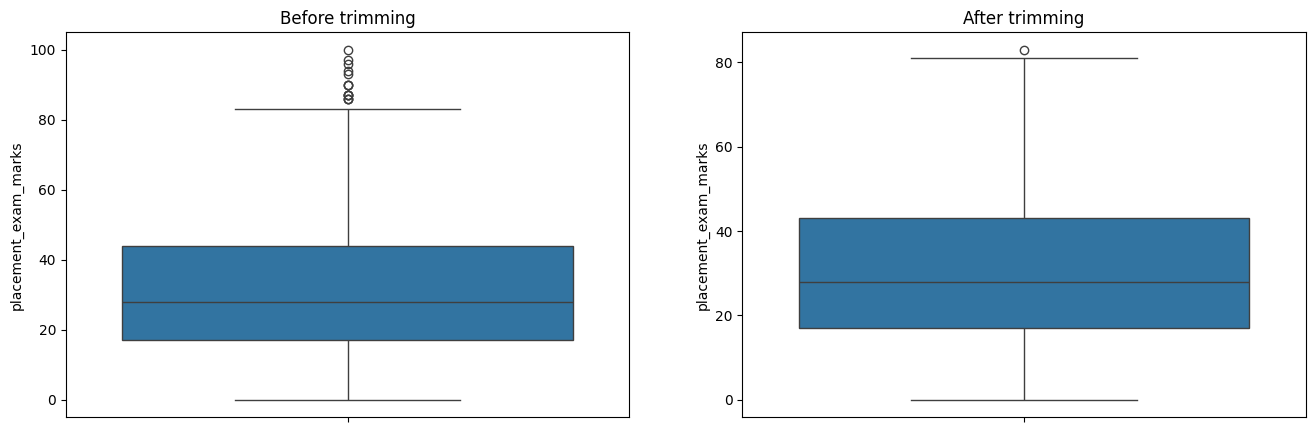

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title('Before trimming')

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])
plt.title('After trimming')

plt.show()

<h2>Capping</h2>

In [26]:
new_df2 = df.copy()

new_df2['placement_exam_marks'] = np.where(
    new_df2['placement_exam_marks'] > upper_limit ,
    upper_limit ,
    np.where(
        new_df2['placement_exam_marks'] < lower_limit ,
        lower_limit,
        new_df2['placement_exam_marks']
    )
)

In [27]:
new_df2.shape

(1000, 3)

In [28]:
new_df2['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

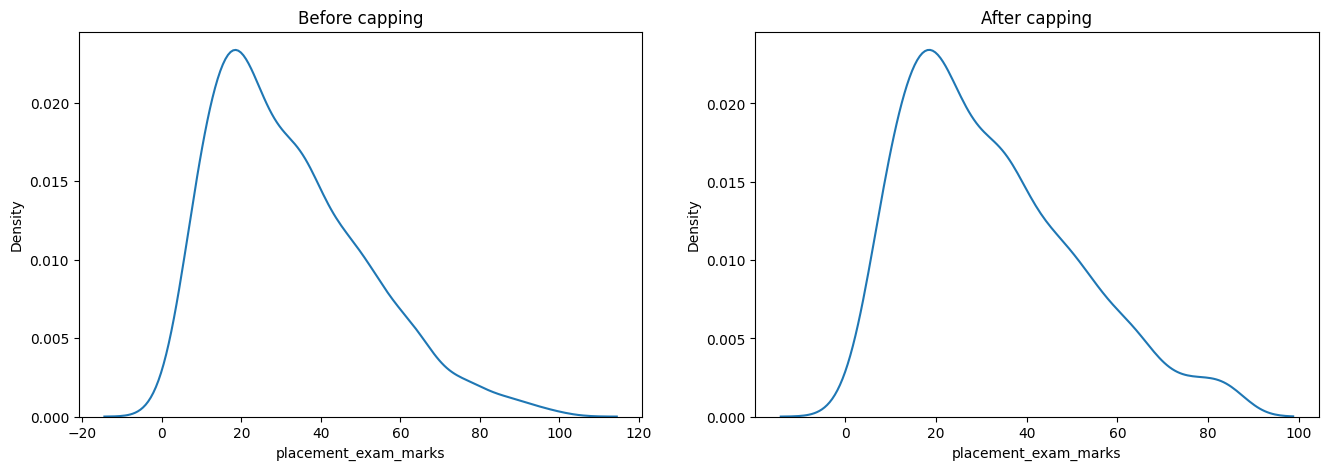

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['placement_exam_marks'])
plt.title('Before capping')

plt.subplot(1,2,2)
sns.kdeplot(new_df2['placement_exam_marks'])
plt.title('After capping')

plt.show()

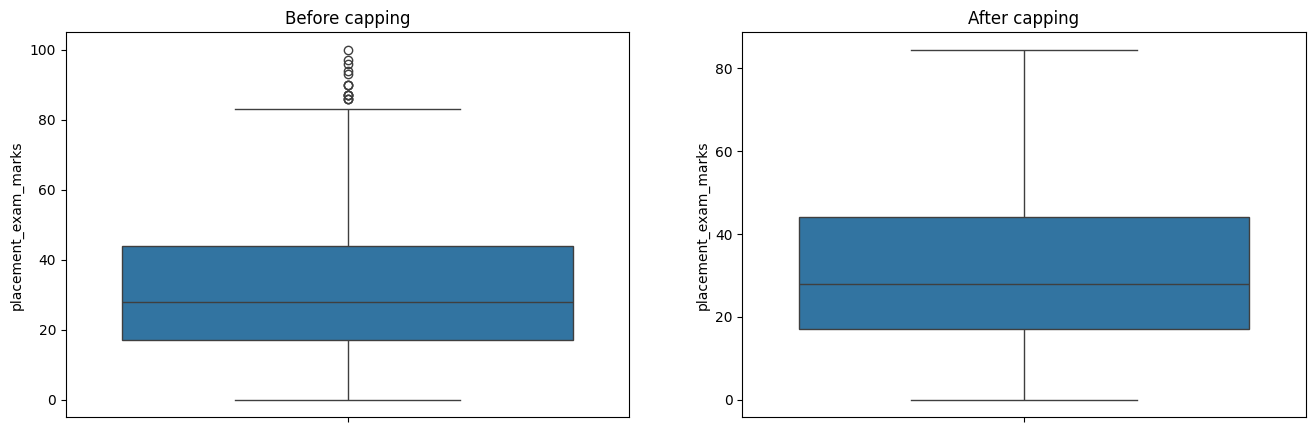

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title('Before capping')

plt.subplot(1,2,2)
sns.boxplot(new_df2['placement_exam_marks'])
plt.title('After capping')

plt.show()